# 2. hands-on session: ***Star vs Quasar*: Decision tree**

# **What does a good dataset look like?**

- enough data points
- not so much omitted data
- distinguishable features
- representative features
- good parameter-space coverage
- unbiased dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc("font", size=15)
pd.options.display.float_format = "{:,.2g}".format
pd.set_option('display.max_rows', 20)

## **Cats vs Dogs**

Exemplary problem: distinguish between *cats* and *dogs* based on their **heights** and **widths**.

In [2]:
Ndog, Ncat = 60, 40

height = np.hstack((np.random.uniform(11, 50, size=Ndog),
                    np.random.uniform(9, 20, size=Ncat)))

width = np.hstack((np.random.uniform(7, 25, size=Ndog),
                   np.random.uniform(5, 14, size=Ncat)))

y = Ndog*["Dog"] + Ncat*["Cat"]

df = pd.DataFrame({"height" : height, "width" : width, "species" : y})
df

,height,width,species
0,19,15,Dog
1,12,12,Dog
2,46,23,Dog
3,49,22,Dog
4,32,23,Dog
...,...,...,...
95,12,8.6,Cat
96,16,7.4,Cat
97,20,12,Cat
98,15,5.5,Cat


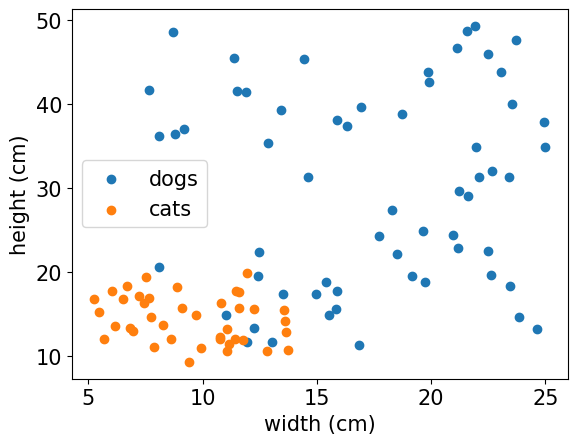

In [3]:
cats = df["species"] == "Cat"
dogs = df["species"] == "Dog"

plt.scatter(df.loc[dogs, "width"], df.loc[dogs, "height"], label="dogs")
plt.scatter(df.loc[cats, "width"], df.loc[cats, "height"], label="cats")

plt.xlabel("width (cm)");
plt.ylabel("height (cm)")
plt.legend();

### **Enough data points**

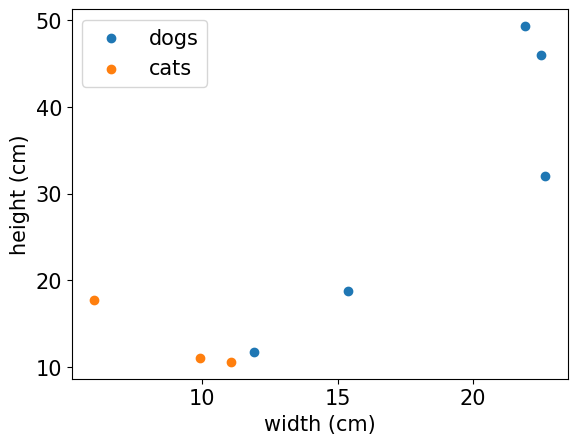

In [4]:
plt.scatter(df.loc[dogs, "width"][:5], df.loc[dogs, "height"][:5], label="dogs")
plt.scatter(df.loc[cats, "width"][:3], df.loc[cats, "height"][:3], label="cats")

plt.xlabel("width (cm)");
plt.ylabel("height (cm)")
plt.legend();

### **Not so much omitted data**

In [6]:
new = df.copy()

new.loc[::2, "width"] = np.nan

new

,height,width,species
0,19,NaN,Dog
1,12,12,Dog
2,46,NaN,Dog
3,49,22,Dog
4,32,NaN,Dog
...,...,...,...
95,12,8.6,Cat
96,16,NaN,Cat
97,20,12,Cat
98,15,NaN,Cat


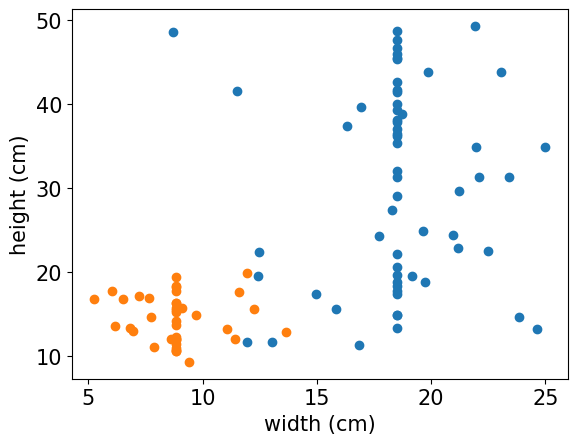

In [7]:
new.loc[cats, "width"] = new.loc[cats, "width"].fillna(np.mean(new.loc[cats, "width"]))
new.loc[dogs, "width"] = new.loc[dogs, "width"].fillna(np.mean(new.loc[dogs, "width"]))

plt.scatter(new[dogs]["width"], new[dogs]["height"], label="dogs")
plt.scatter(new[cats]["width"], new[cats]["height"], label="cats")

plt.xlabel("width (cm)")
plt.ylabel("height (cm)");

### **Distinguishable features**

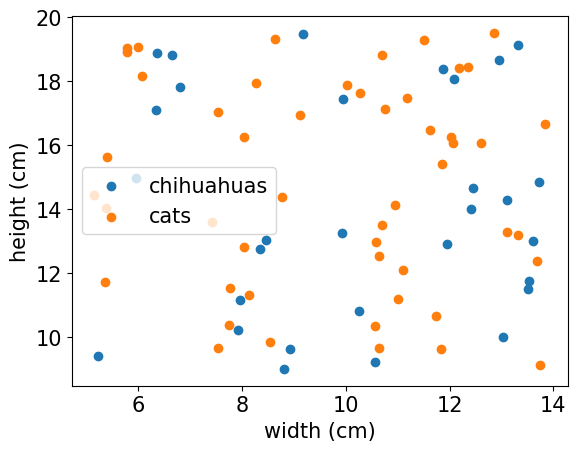

In [9]:
Ncat, Nchihuahua = 50, 30

height = np.hstack((np.random.uniform(9, 20, size=Nchihuahua),
                    np.random.uniform(9, 20, size=Ncat)))

width = np.hstack((np.random.uniform(5, 14, size=Nchihuahua),
                   np.random.uniform(5, 14, size=Ncat)))

y = Ncat * ["Cat"] + Nchihuahua * ["Chihuahua"]

df_new = pd.DataFrame({"height" : height, "width" : width, "species" : y})

cats_new = df_new["species"] == "Cat"
dogs_new = df_new["species"] == "Chihuahua"

plt.scatter(df_new.loc[dogs_new, "width"], df_new.loc[dogs_new, "height"], label="chihuahuas")
plt.scatter(df_new.loc[cats_new, "width"], df_new.loc[cats_new, "height"], label="cats")
plt.xlabel("width (cm)")
plt.ylabel("height (cm)")
plt.legend();

### **Representative features**

In [10]:
Ndog, Ncat = 10, 10

legs = np.hstack((np.ones(Ndog)*4,
                  np.ones(Ncat)*4))

tail = np.hstack(([True for i in range(Ndog)],
                  [True for i in range(Ncat)]))

y = Ndog*["Dog"] + Ncat*["Cat"]

pd.DataFrame({"Legs" : legs, "Tail" : tail, "Species" : y})

,Legs,Tail,Species
0,4,True,Dog
1,4,True,Dog
2,4,True,Dog
3,4,True,Dog
4,4,True,Dog
5,4,True,Dog
6,4,True,Dog
7,4,True,Dog
8,4,True,Dog
9,4,True,Dog


### **Good parameter-space coverage**

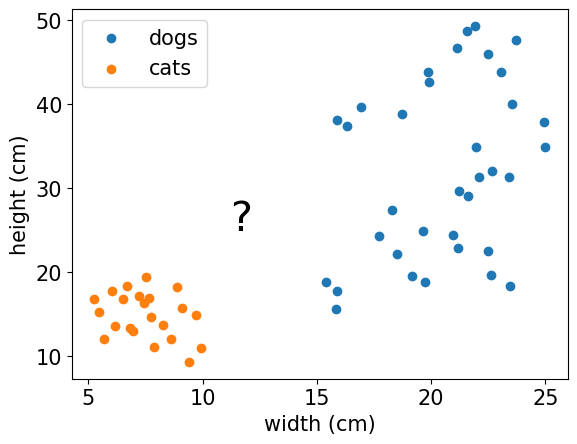

In [13]:
cond_dogs = (df.loc[dogs, "width"] > 15) & (df.loc[dogs, "height"] > 15)
cond_cats = (df.loc[cats, "width"] < 10) & (df.loc[cats, "height"] < 20)

plt.scatter(df.loc[dogs, "width"][cond_dogs], df.loc[dogs, "height"][cond_dogs], label="dogs")
plt.scatter(df.loc[cats, "width"][cond_cats], df.loc[cats, "height"][cond_cats], label="cats")
plt.text(11.2, 25, "?", size=30)

plt.xlabel("width (cm)");
plt.ylabel("height (cm)")
plt.legend();

### **Selection & sampling bias**

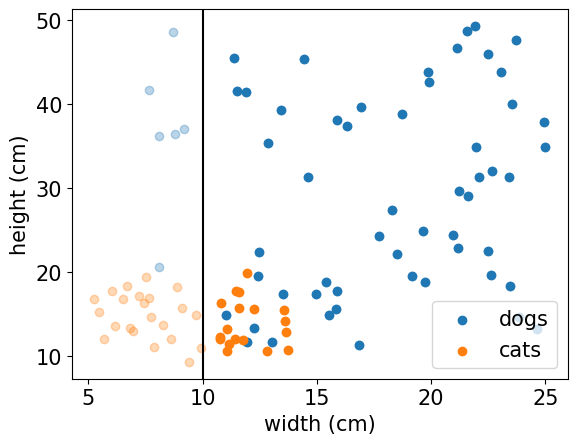

In [14]:
width_limit = 10

cond_dogs = df.loc[dogs, "width"] > width_limit
cond_cats = df.loc[cats, "width"] > width_limit

plt.scatter(df.loc[dogs, "width"], df.loc[dogs, "height"], alpha=0.3, color="C0")
plt.scatter(df.loc[dogs, "width"][cond_dogs], df.loc[dogs, "height"][cond_dogs], label="dogs", color="C0")
plt.scatter(df.loc[cats, "width"], df.loc[cats, "height"], color="C1", alpha=0.3)
plt.scatter(df.loc[cats, "width"][cond_cats], df.loc[cats, "height"][cond_cats], label="cats", color="C1")
plt.axvline(width_limit, color="k")

plt.xlabel("width (cm)")
plt.ylabel("height (cm)")
plt.legend(loc="lower right");

<img src="https://i.redd.it/fpjq7qswyp871.jpg" width=650 align=center style="padding-bottom:40px;padding-top:40px"></img>

#### **Example: Flux-limited studies (Malmquist bias)**

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6a/Bias2.png" width=650 align=left style="padding-bottom:0px;padding-top:30px"></img>

<!-- #### **Example: Hot Jupiters (detection bias)**

<img src="https://raw.githubusercontent.com/tomasplsek/AstroML/main/figures/known_planets.png" width="650px" align="left" style="padding-bottom:40px;padding-top:40px"> -->

# **Where can you get a dataset?**

- [Scikit-learn](https://scikit-learn.org/stable/datasets/toy_dataset.html)
- [Keras](https://keras.io/api/datasets/)
- [Kaggle](https://www.kaggle.com/datasets)
- [HuggingFace](https://huggingface.co/datasets)
- Internet: Photobanks, Weather, Stocks, Bitcoin

## **Scikit-learn Datasets**

### **Blobs & circles (clustering)**

```python
from sklearn import datasets

n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples)
...
...
```

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png" align=left width=950 style="padding-bottom:40px;padding-top:20px">

### **Iris = kosatec (classification, clustering)**

<br>

<img src="https://www.aifunded.es/images/iris.png" align=left width=950 style="padding-bottom:25px">

In [11]:
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=iris["data"], columns=iris["feature_names"])
df["type"] = [iris["target_names"][i] for i in iris["target"]]

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3,5.2,2.3,virginica
146,6.3,2.5,5,1.9,virginica
147,6.5,3,5.2,2,virginica
148,6.2,3.4,5.4,2.3,virginica


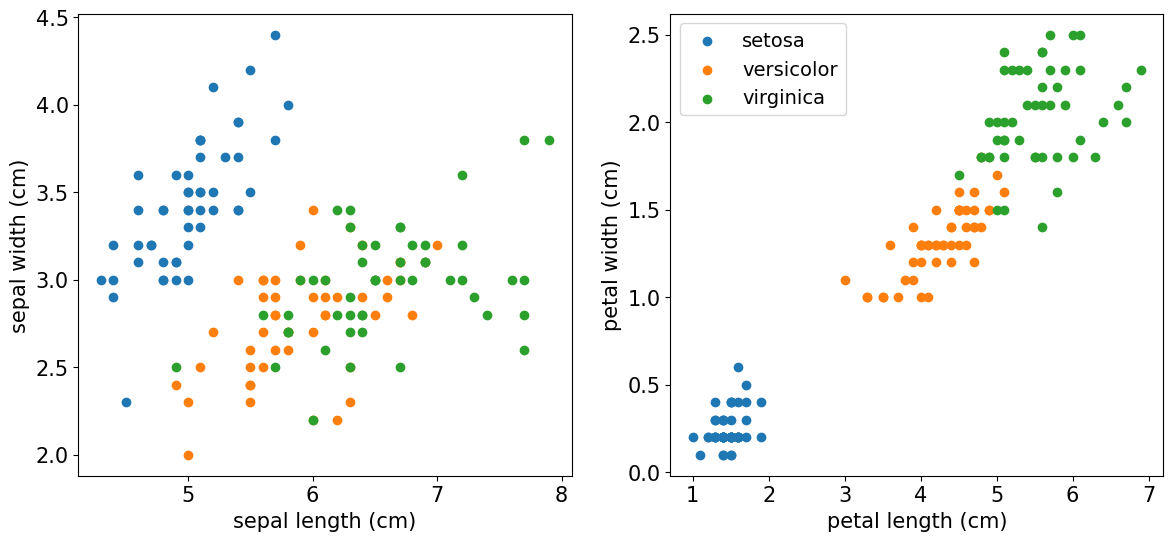

In [12]:
i1, i2, i3 = y == 0, y == 1, y == 2
setosa = df["type"] == "setosa"
versicolor = df["type"] == "versicolor"
virginica = df["type"] == "virginica"

plt.figure(figsize=(14,6))

plt.subplot(121)

col1, col2 = "sepal length (cm)", "sepal width (cm)"
plt.scatter(df.loc[setosa, col1], df.loc[setosa, col2])
plt.scatter(df.loc[versicolor, col1], df.loc[versicolor, col2])
plt.scatter(df.loc[virginica, col1], df.loc[virginica, col2])
plt.xlabel(col1)
plt.ylabel(col2)

plt.subplot(122)
col1, col2 = "petal length (cm)", "petal width (cm)"
plt.scatter(df.loc[setosa, col1], df.loc[setosa, col2], label="setosa")
plt.scatter(df.loc[versicolor, col1], df.loc[versicolor, col2], label="versicolor")
plt.scatter(df.loc[virginica, col1], df.loc[virginica, col2], label="virginica")
plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(fontsize=14);

### **California housing dataset (regression)**

In [13]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df = pd.DataFrame(data["data"], columns=data['feature_names'])
df["MedHouseVal"] = data["target"]

pd.reset_option("display.float_format")
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


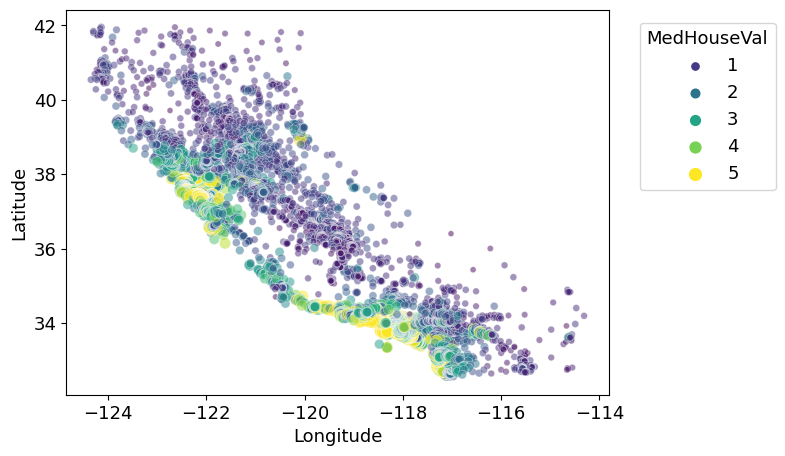

In [14]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(7,5))
plt.rc("font", size=13)
sns.scatterplot(data=df, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.04, 0.99), loc="upper left");

### **MNIST digits (classification)**

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

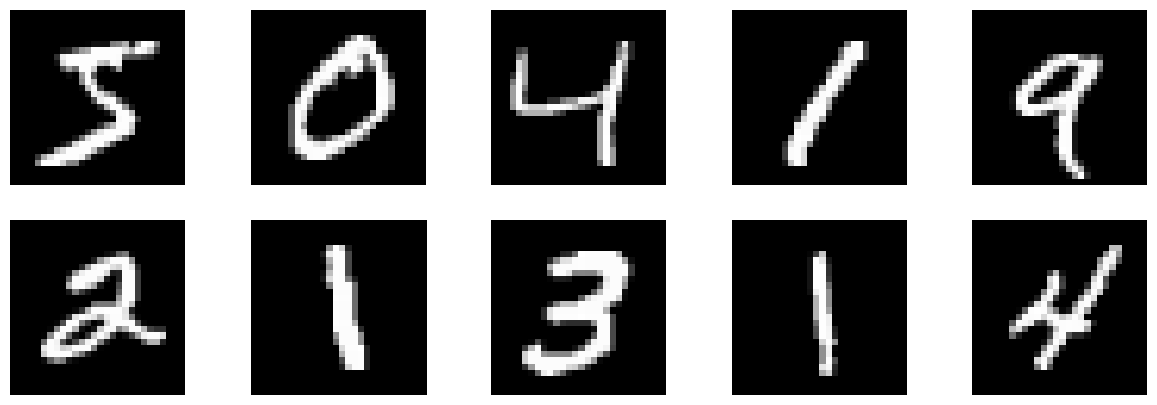

In [15]:
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

fig, axs = plt.subplots(2, 5, figsize=(15,5))
x = 0
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(x_train[x], cmap="gray")
        axs[i,j].axis("off")
        x += 1

x_train.shape

## **Astronomical datasets**

- [AstroML](https://www.astroml.org/user_guide/datasets.html)\
      - SDSS photometry\
      - time-series data (light curves)\
      - spectroscopy

- galaxy classification\
      - [AstroNN](https://astronn.readthedocs.io/en/latest/#)\
      - [Galaxy Zoo](https://www.kaggle.com/competitions/galaxy-zoo-the-galaxy-challenge/data)

- artificial dataset (more advanced)\
      - simulate X-ray spectra ([Xspec](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node72.html))\
      - simulate gamma-ray burst ([cosmogrb](https://github.com/grburgess/cosmogrb))\
      - simulate X-ray images ([pyxsim](https://hea-www.cfa.harvard.edu/~jzuhone/pyxsim/), [SIXTE](https://www.sternwarte.uni-erlangen.de/sixte/))

In [20]:
!pip install astroML

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 2.1 MB/s eta 0:00:00


In [21]:
!pip install astroNN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 75.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 52.5 MB/s eta 0:00:00


### **RR Lyrae (classification)**

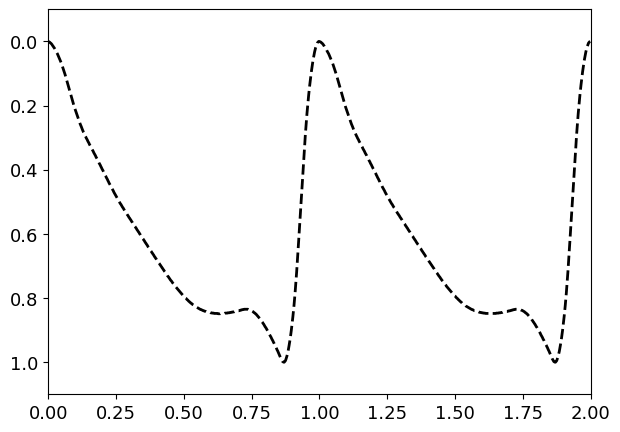

In [24]:
from astroML.datasets import fetch_rrlyrae_templates

templates = fetch_rrlyrae_templates()
x, y = templates['115r'].T

# Plot the results
fig, ax = plt.subplots(figsize=(7, 5))

# plot the true value and the k-term reconstruction
ax.plot(np.concatenate([x, 1 + x]),
        np.concatenate([y, y]), '--k', lw=2)

ax.set_xlim(0, 2)
ax.set_ylim(1.1, -0.1);

### **SDSS spectra (classification, clustering)**


caching to /root/astroML_data/SDSSspec/1615/spSpec-53166-1615-513.fit


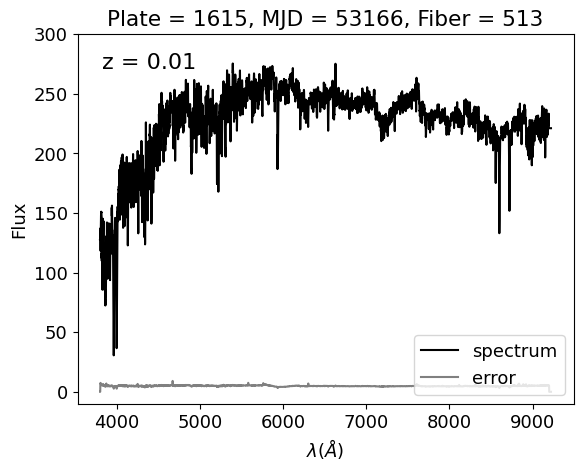

In [25]:
from astroML.datasets import fetch_sdss_spectrum

# Fetch single spectrum
plate = 1615
mjd = 53166
fiber = 513

spec = fetch_sdss_spectrum(plate, mjd, fiber)

# Plot the resulting spectrum
ax = plt.axes()
ax.plot(spec.wavelength(), spec.spectrum, '-k', label='spectrum')
ax.plot(spec.wavelength(), spec.error, '-', color='gray', label='error')

ax.legend(loc=4)

ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())

ax.text(0.05, 0.95, 'z = %.2f' % spec.z, size=16,
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlabel(r'$\lambda (\AA)$')
ax.set_ylabel('Flux')
ax.set_ylim(-10, 300);

### **Galaxy10 (classification)**

In [26]:
from astroNN.datasets import load_galaxy10sdss
# from astroNN.datasets import load_galaxy10  # size = 2.7GB

(X, y) = load_galaxy10sdss()

Galaxy10.h5: 210MB [00:02, 93.7MB/s]                          

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10.h5


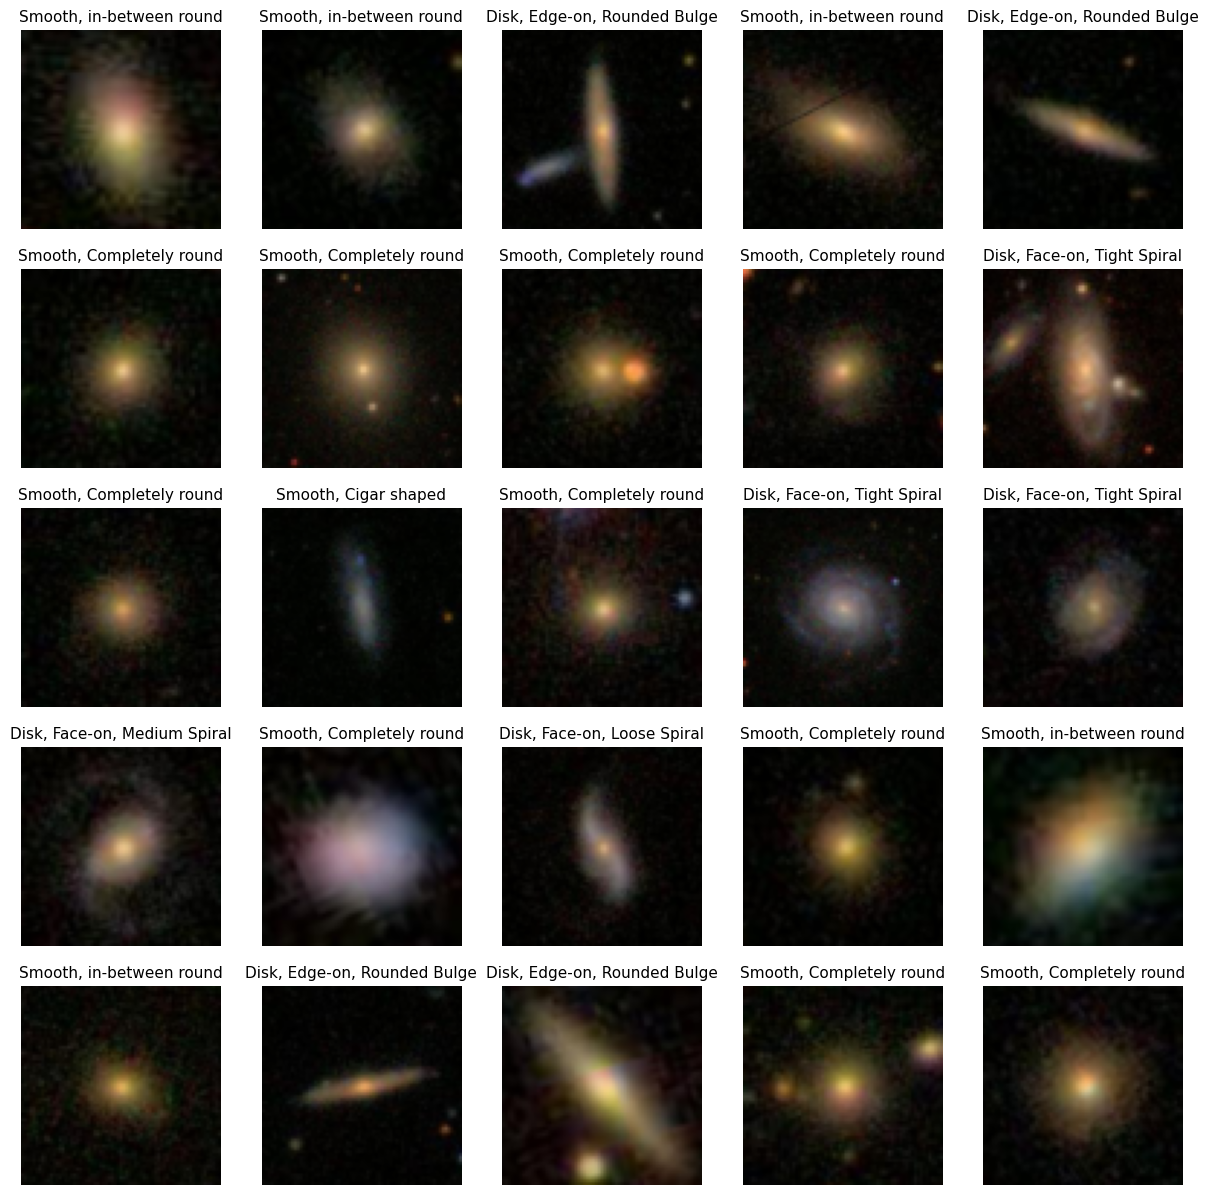

In [27]:
names = {
    0 : 'Disk, Face-on, No Spiral',
    1 : 'Smooth, Completely round',
    2 : 'Smooth, in-between round',
    3 : 'Smooth, Cigar shaped',
    4 : 'Disk, Edge-on, Rounded Bulge',
    5 : 'Disk, Edge-on, Boxy Bulge',
    6 : 'Disk, Edge-on, No Bulge',
    7 : 'Disk, Face-on, Tight Spiral',
    8 : 'Disk, Face-on, Medium Spiral',
    9 : 'Disk, Face-on, Loose Spiral'
}

fig, axs = plt.subplots(5,5, figsize=(15,15))
n = 0
for i in range(5):
    for j in range(5):
        axs[i,j].set_title(names[y[n]], size=11)
        axs[i,j].imshow(X[n])
        axs[i,j].axis("off")
        n += 1

$\,$

# ***Today: Star vs QSO***

<img src="https://cdn.mos.cms.futurecdn.net/HgaCHZDNppE6e52yeDACo6-970-80.jpg.webp" align=left width=400>
<img src="https://earthsky.org/upl/2021/01/supermassive-black-hole-artist-e1610556964639.jpg" align=right width=400>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


## **Sloan Digital Sky Survey (SDSS)**

- photometry & spectroscopy

- fotometry 1 billion objects

- spectroscopy 6 million objects

- **stars** from our Galaxy  &  **quasars** up to $z \approx 6$

- color system `u g r i z`

<img src="https://www.astroml.org/_images/fig_sdss_filters_1.png" align=left width=500>

In [15]:
!wget -c "https://drive.google.com/uc?id=1IoQfGFo13ZP2wTyp-xvzQvguPYhE8TWB" -O "sdss_photo.csv"

--2024-10-10 09:19:03--  https://drive.google.com/uc?id=1IoQfGFo13ZP2wTyp-xvzQvguPYhE8TWB
Resolving drive.google.com (drive.google.com)... 172.217.168.238, 2a00:1450:400e:80d::200e
Connecting to drive.google.com (drive.google.com)|172.217.168.238|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1IoQfGFo13ZP2wTyp-xvzQvguPYhE8TWB [following]
--2024-10-10 09:19:04--  https://drive.usercontent.google.com/download?id=1IoQfGFo13ZP2wTyp-xvzQvguPYhE8TWB
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.36.33, 2a00:1450:400e:810::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.36.33|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; nothing to do.



### **task 1:** load the data from `sdss_photo.csv` and examine them (mean, std, how many stars/QSOs)

### **task 2:** divide the data into two groups (stars & QSOs) and compare them graphically

hint: `seaborn.pairplot`

### **task 3:** compute color indices from neighbouring filters and plot them

### **task 4:** pick an index / combination of indices & filters and write single condition that best divides the two groups

example:

`u-g < 1.0` &rarr; QSO

and make a new column `data["guess"]`

### **task 5:** estimate how many datapoints were guessed correctly

hint: compare column `data["guess"]` with column `data["target"]`\
hint2: if you do `sum([True, True, False])` you get number of `True` occurences in the list

### **Scikit-learn naming convention**

```python
X = [[5.1, 3.5, 1.4, 0.2],
     [4.9, 3.1, 0.4, 0.3],
     [4.7, 3.2, 1.3, 0.2],
     [5.0, 3.6, 1.1, 0.2],
     [5.1, 3.5, 1.4, 0.2]]

y = ["versicolor", "setosa", "virginica", "setosa", "versicolor"]


from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)

dt.fit(X, y)

y_pred = dt.predict(X_test)

dt.score(X_test, y_test)
```

### **task 6:** create `X` a `y` variables

hint:

use original dataframe `data`

u, u-g  &rarr;  `X`

`y`:  $\,$QSO &rarr; 0\
&nbsp; &nbsp; &nbsp; &nbsp; star &rarr; 1

### **task 7:** for scikit-learn import `DecisionTreeClassifier` and use its `fit()` method

<img src="https://www.researchgate.net/profile/Amir-Akbari-19/publication/348456545/figure/fig1/AS:981743439994883@1611077284634/Schematic-of-a-Decision-Tree-The-figure-shows-an-example-of-a-decision-tree-with-3.png" width=400>

### **task 8:** use method predict on the `X` variable and compare the output to `y`

### **Confusion matrix**

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

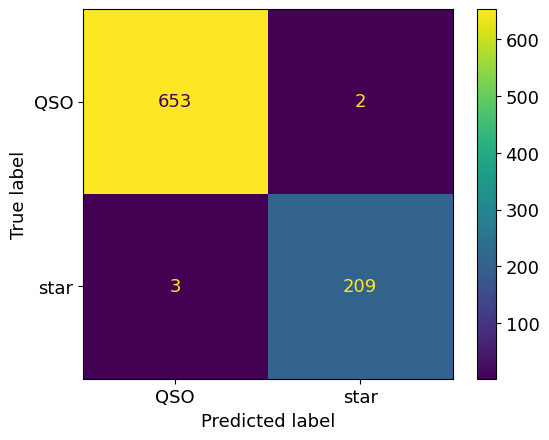

In [55]:
ConfusionMatrixDisplay.from_estimator(dt, X, y, display_labels=["QSO", "star"]);

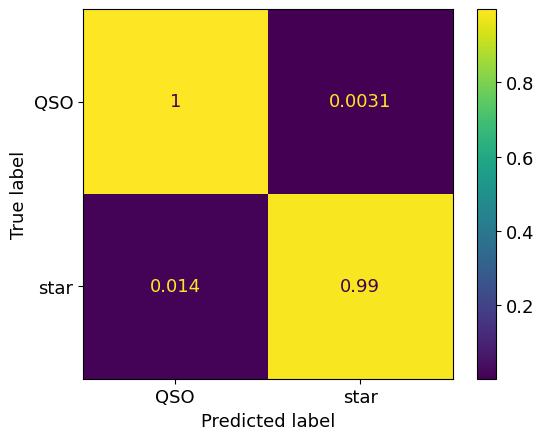

In [56]:
ConfusionMatrixDisplay.from_estimator(dt, X, y, display_labels=["QSO", "star"], normalize='true');

### **Decision tree visualization**

In [57]:
from sklearn.tree import plot_tree

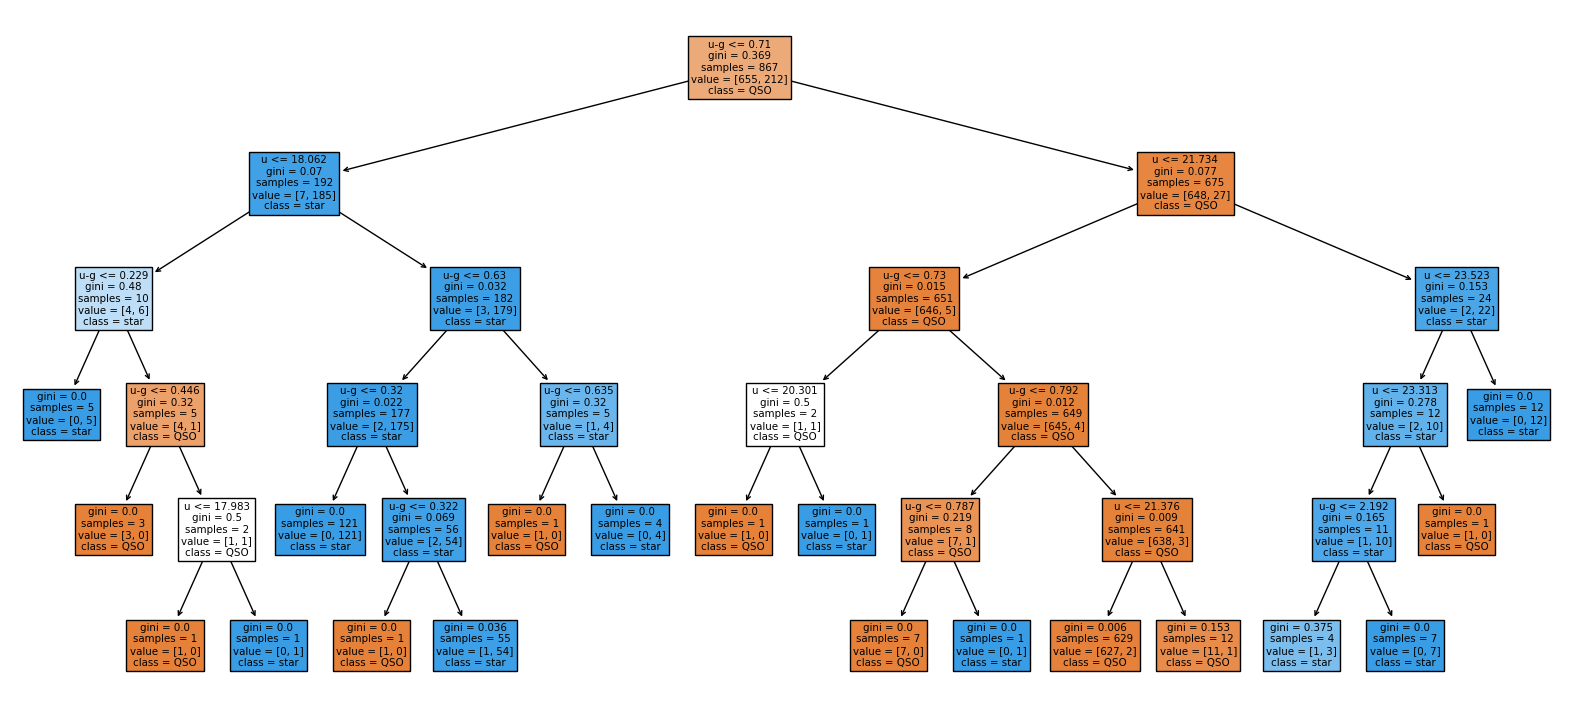

In [58]:
fig, ax = plt.subplots(figsize=(20,9))
plot_tree(dt,
          feature_names=X.columns,
          class_names=["QSO", "star"],
          filled=True,
          ax=ax);

In [59]:
# !pip install dtreeviz
# from dtreeviz import dtreeviz

In [60]:
# viz = dtreeviz(dt2, X, y,
#                feature_names=X.columns,
#                class_names=["QSO", "star"])

# viz

### **Decision surface**

In [61]:
def plot_decision_surface(classifier, data, col1, col2):
    # Number of points in the grid
    size = 100

    # Create U & U-G meshgrid
    range_X = np.linspace(min(data[col1]), max(data[col1]), size)
    range_Y = np.linspace(min(data[col2]), max(data[col2]), size)
    X, Y = np.meshgrid(range_X, range_Y)
    grid = np.vstack((X.flatten(), Y.flatten())).T
    grid = pd.DataFrame(data=grid, columns=[col1,col2])

    # Predict classes for the whole grid of values
    predicted = classifier.predict(grid)

    # Reshape back to 100x100 and plot countours
    predicted = predicted.reshape(size,size)
    plt.contourf(X, Y, predicted)

    # Overplot with datapoints
    plt.plot(data.loc[qso, col1], data.loc[qso, col2], "o")
    plt.plot(data.loc[star, col1], data.loc[star, col2], "o");
    plt.xlabel(f"{col1} [mag]")
    plt.ylabel(f"{col2} [mag]");

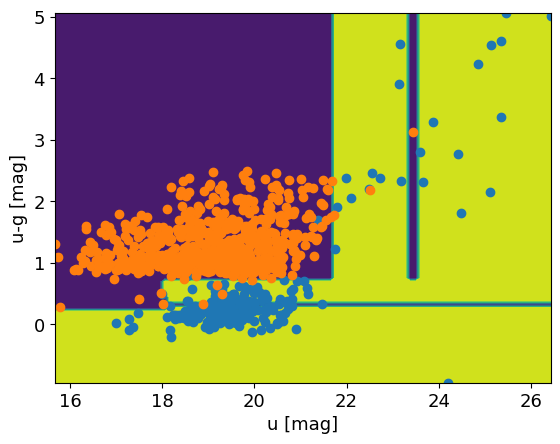

In [62]:
plot_decision_surface(dt, data, col1="u", col2="u-g")

### **Is that a good model?**

<h1 style="padding-left:250px">Overfitting vs Underfitting</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/1024px-Overfitting.svg.png" style="padding-left:80px" width=600>

### **task 9:** split the data in the 9:1 ratio, train on 90% and test on 10% of data

hint: use can use `train_test_split`

### **task 10:** import `RandomForestClassifier` and repeat tasks 8 & 9

![](https://miro.medium.com/max/1200/1*hmtbIgxoflflJqMJ_UHwXw.jpeg)

### **task 11:** choose a source and apply the model

http://skyserver.sdss.org/dr7/en/tools/search/radial.asp